# Experiementing with Maximum Likelihood Parameter Estimation (MLE)

In [1]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

## Generate data

In [2]:
N = 100
x = np.linspace(0,20,N)
ϵ = np.random.normal(loc = 0.0, scale = 5.0, size = N)
y = 3*x + ϵ
df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

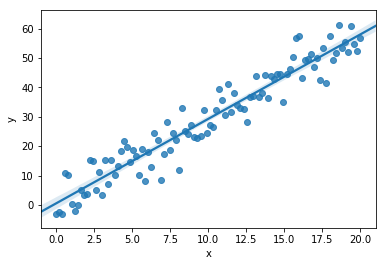

In [3]:
sns.regplot(df.x, df.y);

In [16]:
X = np.array(df[['constant', 'x']])

## fit model and summarize

In [17]:
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1127.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           1.47e-55
Time:                        16:28:34   Log-Likelihood:                -301.73
No. Observations:                 100   AIC:                             607.5
Df Residuals:                      98   BIC:                             612.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5279      0.992      0.532      0.596      -1.440       2.496
x1             2.8759      0.086     33.576      0.000       2.706       3.046
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.423
Skew:                           0.041   Prob(JB):                        0.809
Kurtosis:                       2.692   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Maximum Likelihood 

### define likelihood function


In [18]:
def MLERegression(params):
    intercept, beta, std = params[0], params[1], params[2] # inputs are guesses at our parameters
    yhat = intercept + beta*x # predictions
    
    # next, we flip the Bayesian question
    # compute PDF of observed values normally distributed around mean (yhat)
    # with a standard deviation of sd
    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=std) )
    # return negative LL
    return(negLL)

In [19]:
# let’s start with some random coefficient guesses and optimize
guess = np.array([5,5,2])
results = minimize(MLERegression, guess, method = 'Nelder-Mead', 
          options={'disp': True})

Optimization terminated successfully.
         Current function value: 301.726672
         Iterations: 98
         Function evaluations: 173


In [20]:
results

 final_simplex: (array([[0.52789908, 2.87590985, 4.94476159],
       [0.52798887, 2.87590151, 4.94477837],
       [0.52792967, 2.87590022, 4.94475339],
       [0.52789534, 2.87590965, 4.94479709]]), array([301.72667248, 301.72667249, 301.72667249, 301.72667249]))
           fun: 301.7266724843189
       message: 'Optimization terminated successfully.'
          nfev: 173
           nit: 98
        status: 0
       success: True
             x: array([0.52789908, 2.87590985, 4.94476159])

In [21]:
coefficients = results['x'][0:-1] 

In [25]:
y_pred = X.dot(coefficients)

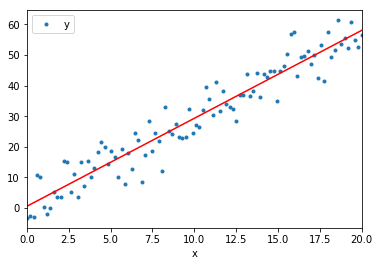

In [29]:
fig,ax = plt.subplots()
df.plot(x='x', y='y', ax=ax, style = '.')
ax.plot(x, y_pred,'r-')